In [2]:
from pdfminer.high_level import extract_text

text2 = extract_text("Site_Info.pdf")

In [2]:
text2

'GEORGIA ENVIRONMENTAL PROTECTION DIVISION\nHAZARDOUS SITE INVENTORY\n\nSite Number\n\n10001\n\nSITE NAME:\nLOCATION:\n\nDow Chemical - Dalton Site\n1467 Prosser Dr., SE\nDalton, Whitfield County, GA 30721\n\nACREAGE\n\nLatitude 34 o 37\nPARCEL NUMBER\n\n\'\n\n58\n\n" N\n\n380.2\n\n13-202-01-000\n\nLAST KNOWN PROPERTY OWNER:\n\nStyron LLC\n1000 Chesterbrook Blvd, Suite 300\nBerwyn, PA  19312-1084\n\nLongitude 84 o 55 \' 41\n\n" W\n\nDATE LISTED\n\n6/29/1994\n\nSTATUS OF CLEANUP ACTIVITIES:\nCleanup activities are being conducted for source materials, soil, and groundwater.\n\nCLEANUP PRIORITY:\n\nThe Director has designated this site as a Class\n\nIV\n\nGA EPD DIRECTOR\'S DETERMINATION REGARDING CORRECTIVE ACTION:\nThe Director has determined that this site requires corrective action.\n\nREGULATED SUBSTANCES RELEASED, AND THREATS TO HUMAN HEALTH AND ENVIRONMENT POSED BY \nTHE RELEASE:\n\nThis site has a known release of Carbon tetrachloride in groundwater at levels exceeding the report

In [3]:
k =0 
file = 0

file_mapping = {}

for i in repr(text2).split(sep = "Site Number"):
    if k == 0:
        k += 1
        continue
    
    file_mapping.update({"output_" + str(file) + ".png":i.split(sep = "\\n\\n")[1]})

    file += 1


In [4]:
file_mapping

{'output_0.png': '10001',
 'output_1.png': '10002',
 'output_2.png': '10003',
 'output_3.png': '10005',
 'output_4.png': '10006',
 'output_5.png': '10008',
 'output_6.png': '10009',
 'output_7.png': '10009',
 'output_8.png': '10012',
 'output_9.png': '10015',
 'output_10.png': '10016',
 'output_11.png': '10017',
 'output_12.png': '10018',
 'output_13.png': '10019',
 'output_14.png': '10020',
 'output_15.png': '10021',
 'output_16.png': '10022',
 'output_17.png': '10024',
 'output_18.png': '10024',
 'output_19.png': '10025',
 'output_20.png': '10026',
 'output_21.png': '10027',
 'output_22.png': '10028',
 'output_23.png': '10029',
 'output_24.png': '10029',
 'output_25.png': '10030',
 'output_26.png': '10032',
 'output_27.png': '10043',
 'output_28.png': '10044',
 'output_29.png': '10045',
 'output_30.png': '10045',
 'output_31.png': '10046',
 'output_32.png': '10048',
 'output_33.png': '10053',
 'output_34.png': '10055',
 'output_35.png': '10056',
 'output_36.png': '10057',
 'output_37

In [5]:
import numpy as np
from PIL import Image
import pytesseract
import re
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import io
from pytesseract import Output
import cv2
import os
import datetime
# Image cleaners
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [6]:
import pandas as pd

sites = pd.read_csv("sites.csv")

sites

HSI #                                       Site Name  Lattitude  \
0    10001                      Dow Chemical - Dalton Site   34.63278   
1    10002                                   Shaver's Farm   34.79889   
2    10003    CSX Transportation - Savannah (Tremont Road)   32.06222   
3    10005               G. C. Lee Site / Lee Engr & Const   30.98833   
4    10006                Hercules 009 Landfill - NPL Site   31.20944   
..     ...                                             ...        ...   
464  10960                           15667 Alabama Highway   34.76833   
465  10961                      21-Acre Undeveloped Parcel   33.81417   
466  10962             Piedmont Paints and Primer (Former)   34.53639   
467  10963   Aerospace Defense Coatings (ADC) - Main Plant   32.69833   
468  10964  Aerospace Defense Coatings (ADC) - Grace Plant   32.70667   

     Longitude                                            Address  \
0    -84.92806                               1467 Prosser Dr., SE   
1    -85.30750                               651 Shaver Farm Road   
2    -81.14917                                   3000 Tremont Rd.   
3    -82.89667                                     Lutz Farm Road   
4    -81.48806  Granville Nix Rd and Ga Hwy 25 (Golden Isles P...   
..         ...                                                ...   
464  -85.15000                              15667 Alabama Highway   
465  -84.48250           James Jackson Pkwy @ Chattahoochee River   
466  -83.30111                               80 Isaac Walker Road   
467  -83.66333                            7700 NE Industrial Blvd   
468  -83.66611                                    2790 Grace Road   

            City     County List Date Class  \
0         Dalton  Whitfield   6/29/94    IV   
1    Chickamauga     Walker   6/29/94    II   
2       Savannah    Chatham   6/29/94     V   
3         Dupont     Clinch   6/29/94    IV   
4      Brunswick      Glynn   6/29/94    IV   
..           ...        ...       ...   ...   
464  Rock Spring    Catoosa  10/28/21    II   
465      Atlanta     Fulton  12/21/21    II   
466       Toccoa   Stephens    6/1/22    II   
467        Macon       Bibb    6/1/23     I   
468        Macon       Bibb    6/1/23     I   

                                          Site Summary  \
0    https://epd.georgia.gov/document/pdf/23-10001/...   
1    https://epd.georgia.gov/document/pdf/23-10002/...   
2    https://epd.georgia.gov/document/hsi/23-10003/...   
3    https://epd.georgia.gov/document/pdf/23-10005/...   
4    https://epd.georgia.gov/document/pdf/23-10006/...   
..                                                 ...   
464  https://epd.georgia.gov/document/pdf/23-10960/...   
465  https://epd.georgia.gov/document/pdf/23-10961/...   
466  https://epd.georgia.gov/document/pdf/23-10962/...   
467  https://epd.georgia.gov/document/pdf/23-10963/...   
468  https://epd.georgia.gov/document/pdf/23-10964/...   

    Investigation/ Cleanup Funding       Icon  
0                               RP  small_red  
1                               RP  small_red  
2                               RP  small_red  
3                               RP  small_red  
4                               RP  small_red  
..                             ...        ...  
464                             RP  small_red  
465                             RP  small_red  
466                             RP  small_red  
467                             RP  small_red  
468                             RP  small_red  

[469 rows x 12 columns]

I had chaptGPT summarize the code since I forgot the approach I used:

The provided code segment is designed to extract information about chemicals in soil and groundwater from tabular data within images, leveraging the pytesseract library for Optical Character Recognition (OCR). It begins by converting the image to text to search for a specific keyword ("REGULATED"), indicating the relevant section's commencement. Utilizing pytesseract.image_to_data, it obtains detailed OCR data, including text positions and dimensions. The process of dynamically identifying the table's start involves setting a high initial value for start_scanning, which is adjusted upon detecting the keyword, marking the scanning commencement point. As the code iterates through OCR-detected text elements, it distinguishes between chemical names and their associated checkboxes based on their positions, using predefined coordinates to identify checkbox locations for soil and groundwater. The checkboxes' status is determined by analyzing pixel densities within specified regions. This methodical approach allows for dynamic adjustment to varying table formats and contents, ensuring accurate data extraction regarding the presence of chemicals in environmental samples.

In [ ]:
file_path = 'Site_Info.pdf'

images = convert_from_path(file_path, fmt = "png")

for i in range(len(images)):
    page = images[i]
    page.save('output_{}.png'.format(i), 'png')

In [16]:
def contains_date(string):
    pattern = r'/\d{4}'
    if re.search(pattern, string):
        return True
    else:
        return False

# Function to find latitude
def is_latitude(text):
    return "Latitude" in text

# Testing
file_path = 'Site_Info.pdf'

# This concerts all of the pags to pngs



# Function to extract the region of interest containing the table

# Data Structure {site_number:{date:xyz,name:xyz,long:xyz,lat:xyz,chemicals:[]}}

all_data = {}

def extract_table_region(image, imgname):
    site_number = file_mapping[imgname]
    site_number = int(site_number)

    txt = pytesseract.image_to_string(image)

    # So the pdf 
    if "REGULATED" in txt:
        ok = True
    else:
        ok = False

    d = pytesseract.image_to_data(image, output_type=Output.DICT, config = "--psm 6")

    img = image
    
    # GW and Soil values for the checkpoint detection
    gw1_left = 700
    gw1_right = 700 + 34
    gw2_left = 1444
    gw2_right = 1444 + 34
    soil1_left = 750
    soil1_right = 750 + 34
    soil2_left = 1494
    soil2_right = 1494 + 34

    # Indicates to start scanning
    scan = 0 
    start_scanning = 10000000

    # Some scanning variables
    starting_left = 0
    starting_right = 0
    naming = []
    

    n_boxes = len(d['text'])
    if ok == False:
        for i in range(n_boxes):
            start_scanning = 200
                        
            if start_scanning < d["top"][i]:
                if d["text"][i] == "":
                    continue
                elif d["text"][i] == " ":
                    continue
                elif d["width"][i] > 25:
                    print(d["text"][i])
                    if d["left"][i] < gw1_left:
                        print(d["text"][i])
                        # Clear name
                        if starting_left == 0:
                            # Update the entry when switch sides
                            if naming != []:
                                if gw_state:
                                    all_data[site_number]["chemicals_gw"].add(" ".join(naming))
                                if soil_state:
                                    all_data[site_number]["chemicals_soil"].add(" ".join(naming))

                            naming = []
                            gw_state = False
                            soil_state = False
        
                        # Add to name
                        naming.append(d["text"][i])
                        
                        starting_left = 1

                        # And now we detect the checkmark status
                        checkbox_area_gw = image[d["top"][i]:d["top"][i] + d["height"][i], gw1_left:gw1_right]
                        checkbox_area_soil = image[d["top"][i]:d["top"][i] + d["height"][i], soil1_left:soil1_right]

                        # Change to gray
                        #checkbox_gray_gw = cv2.cvtColor(checkbox_area_gw, cv2.COLOR_BGR2GRAY)
                        #checkbox_gray_soil = cv2.cvtColor(checkbox_area_soil, cv2.COLOR_BGR2GRAY)

                        # Threshold
                        _, thresh_gw = cv2.threshold(checkbox_area_gw, 150, 255, cv2.THRESH_BINARY_INV)
                        _, thresh_soil = cv2.threshold(checkbox_area_soil, 150, 255, cv2.THRESH_BINARY_INV)

                        non_white_pixels_gw = cv2.countNonZero(thresh_gw)
                        non_white_pixels_soil = cv2.countNonZero(thresh_soil)

                        height = d["height"][i]
                        width = gw1_right - gw1_left

                        num_pixels = height * width

                        if non_white_pixels_gw/num_pixels > 0.18:
                            gw_state = True
                        if non_white_pixels_soil/num_pixels > 0.18:
                            soil_state = True

                    else:
                        print(d["text"][i])
                        if starting_left == 1:
                            # Update the entry when switch sides
                            if gw_state:
                                all_data[site_number]["chemicals_gw"].add(" ".join(naming))
                            if soil_state:
                                all_data[site_number]["chemicals_soil"].add(" ".join(naming))
                            naming = []
                            gw_state = False
                            soil_state = False

                        starting_left = 0

                        naming.append(d["text"][i])

                        # And now we detect the checkmark status
                        checkbox_area_gw = image[d["top"][i]:d["top"][i] + d["height"][i], gw2_left:gw2_right]
                        checkbox_area_soil = image[d["top"][i]:d["top"][i] + d["height"][i], soil2_left:soil2_right]
                        
                        # Change to gray
                        #checkbox_gray_gw = cv2.cvtColor(checkbox_area_gw, cv2.COLOR_BGR2GRAY)
                        #checkbox_gray_soil = cv2.cvtColor(checkbox_area_soil, cv2.COLOR_BGR2GRAY)

                        _, thresh_gw = cv2.threshold(checkbox_area_gw, 150, 255, cv2.THRESH_BINARY_INV)
                        _, thresh_soil = cv2.threshold(checkbox_area_soil, 150, 255, cv2.THRESH_BINARY_INV)

                        non_white_pixels_gw = cv2.countNonZero(thresh_gw)
                        non_white_pixels_soil = cv2.countNonZero(thresh_soil)

                        height = d["height"][i]
                        width = gw1_right - gw1_left

                        num_pixels = height * width

                        if non_white_pixels_gw/num_pixels > 0.18:
                            gw_state = True
                        if non_white_pixels_soil/num_pixels > 0.18:
                            soil_state = True

    else:
        if site_number not in all_data:
            print(site_number)
            # Obtain name, long, and lat values from the Excel Sheet
            all_data.update({site_number:{"date":list(sites.loc[sites["HSI #"] == site_number,:]["List Date"])[0],
                                        "name":list(sites.loc[sites["HSI #"] == site_number,:]["Site Name"])[0],	
                                        "type":list(sites.loc[sites["HSI #"] == site_number,:]["Investigation/ Cleanup Funding"])[0],
                                        "long":list(sites.loc[sites["HSI #"] == site_number,:]["Longitude"])[0],
                                        "lat":list(sites.loc[sites["HSI #"] == site_number,:]["Lattitude"])[0],
                                        "chemicals_soil":set(), "chemicals_gw":set()}})
        for i in range(n_boxes):
            # Test for regulated
            if "REGULATED" in d["text"][i]:
                if scan == 0:
                    scan += 1
                elif scan == 1:
                    start_scanning = d["top"][i] + d["height"][i] + 15

            # Basically, here we assign where we would should for the check box
            # We assume that it will run from left to right of the document
            # Which seems to be the case

            if start_scanning < d["top"][i]:
                if d["text"][i] == "":
                    continue
                elif d["text"][i] == " ":
                    continue
                elif d["width"][i] > 25:
                    if d["left"][i] < gw1_left:
                        # Clear name
                        if starting_left == 0:
                            # Update the entry when switch sides
                            if naming != []:
                                if gw_state:
                                    all_data[site_number]["chemicals_gw"].add(" ".join(naming))
                                if soil_state:
                                    all_data[site_number]["chemicals_soil"].add(" ".join(naming))

                            naming = []
                            gw_state = False
                            soil_state = False
        
                        # Add to name
                        naming.append(d["text"][i])
                        
                        starting_left = 1

                        # And now we detect the checkmark status
                        checkbox_area_gw = image[d["top"][i]:d["top"][i] + d["height"][i], gw1_left:gw1_right]
                        checkbox_area_soil = image[d["top"][i]:d["top"][i] + d["height"][i], soil1_left:soil1_right]

                        # Change to gray
                        #checkbox_gray_gw = cv2.cvtColor(checkbox_area_gw, cv2.COLOR_BGR2GRAY)
                        #checkbox_gray_soil = cv2.cvtColor(checkbox_area_soil, cv2.COLOR_BGR2GRAY)

                        # Threshold
                        _, thresh_gw = cv2.threshold(checkbox_area_gw, 150, 255, cv2.THRESH_BINARY_INV)
                        _, thresh_soil = cv2.threshold(checkbox_area_soil, 150, 255, cv2.THRESH_BINARY_INV)

                        non_white_pixels_gw = cv2.countNonZero(thresh_gw)
                        non_white_pixels_soil = cv2.countNonZero(thresh_soil)

                        height = d["height"][i]
                        width = gw1_right - gw1_left

                        num_pixels = height * width

                        if non_white_pixels_gw/num_pixels > 0.18:
                            gw_state = True
                        if non_white_pixels_soil/num_pixels > 0.18:
                            soil_state = True

                    else:
                        if starting_left == 1:
                            # Update the entry when switch sides
                            if gw_state:
                                all_data[site_number]["chemicals_gw"].add(" ".join(naming))
                            if soil_state:
                                all_data[site_number]["chemicals_soil"].add(" ".join(naming))
                            naming = []
                            gw_state = False
                            soil_state = False

                        starting_left = 0

                        naming.append(d["text"][i])

                        # And now we detect the checkmark status
                        checkbox_area_gw = image[d["top"][i]:d["top"][i] + d["height"][i], gw2_left:gw2_right]
                        checkbox_area_soil = image[d["top"][i]:d["top"][i] + d["height"][i], soil2_left:soil2_right]
                        
                        # Change to gray
                        #checkbox_gray_gw = cv2.cvtColor(checkbox_area_gw, cv2.COLOR_BGR2GRAY)
                        #checkbox_gray_soil = cv2.cvtColor(checkbox_area_soil, cv2.COLOR_BGR2GRAY)

                        _, thresh_gw = cv2.threshold(checkbox_area_gw, 150, 255, cv2.THRESH_BINARY_INV)
                        _, thresh_soil = cv2.threshold(checkbox_area_soil, 150, 255, cv2.THRESH_BINARY_INV)

                        non_white_pixels_gw = cv2.countNonZero(thresh_gw)
                        non_white_pixels_soil = cv2.countNonZero(thresh_soil)

                        height = d["height"][i]
                        width = gw1_right - gw1_left

                        num_pixels = height * width

                        if non_white_pixels_gw/num_pixels > 0.18:
                            gw_state = True
                        if non_white_pixels_soil/num_pixels > 0.18:
                            soil_state = True

    # Update the final entry here which is missed in the loop
    if naming != []:
        if gw_state:
            all_data[site_number]["chemicals_gw"].add(" ".join(naming))
        if soil_state:
            all_data[site_number]["chemicals_gw"].add(" ".join(naming))
        print("Updating final entry")

    return all_data



In [39]:
list(sites.loc[sites["HSI #"] == 10490,:]["List Date"])

['8/14/97']

V1 Test.

In [1]:
# Sort

def extract_number(filename):
    # This function uses regular expressions to find the first sequence of digits in the filename
    # and returns it as an integer.
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else None

files = os.listdir("./")

files_png = []

for f in files:
    if ".png" in f:
        files_png.append(f)

sorted_files = sorted(files_png, key=extract_number)

NameError: name 'os' is not defined

In [17]:
# Extracts all data

for i in sorted_files:
    if "png" in i:
        img = cv2.imread(i)
        img2 = get_grayscale(img)
        img2 = thresholding(img2)

        table_region = extract_table_region(img2, i)



10001
Updating final entry
10002
Updating final entry
10003
Updating final entry
10005
Updating final entry
10006
Updating final entry
10008
Updating final entry
10009
Updating final entry
Trichloroethene
Trichloroethene
Trichlorofluoromethane
Trichlorofluoromethane
Vinyl
Vinyl
chloride
chloride
in|
in|
Xylenes
Xylenes
Updating final entry
10012
Updating final entry
10015
Updating final entry
10016
Updating final entry
10017
Updating final entry
10018
Updating final entry
10019
Updating final entry
10020
Updating final entry
10021
Updating final entry
10022
Updating final entry
10024
Updating final entry
Fluoranthene
Fluoranthene
im
im
Heptachlor
Heptachlor
Indeno(1,2,3-cd)pyrene
Indeno(1,2,3-cd)pyrene
im
im
Isophorone
Isophorone
Lindane
Lindane
Malathion
Malathion
Methyl
Methyl
ethyl
ethyl
ketone
ketone
Methyl
Methyl
parathion
parathion
Naphthalene
Naphthalene
Nitrobenzene
Nitrobenzene
Parathion
Parathion
p-Dichlorobenzene
p-Dichlorobenzene
p-Nitrophenol
p-Nitrophenol
Pyrene
Pyrene
Te

In [41]:
all_data.keys()

dict_keys([10019, 10652, 10628, 10521])

In [20]:
table_region

{10001: {'date': '6/29/94',
  'name': 'Dow Chemical - Dalton Site',
  'type': 'RP',
  'long': -84.92806,
  'lat': 34.63278,
  'chemicals_soil': {'1,1-Dichloroethene',
   'Carbon tetrachloride',
   'Chloroform',
   'Chromium',
   'Ethylbenzene',
   'Pyrene',
   'Toluene',
   'Trichloroethene',
   'im Chromium'},
  'chemicals_gw': {'1,1,1,2-Tetrachloroethane',
   '1,1-Dichloroethene',
   'Bromoform',
   'Carbon tetrachloride',
   'Chloroform',
   'Dichloromethane',
   'Ethylbenzene',
   'LJ 1,1,2-Trichloroethane',
   'Pyrene',
   'Styrene',
   'Tetrachloroethene',
   'Toluene',
   'Trichloroethene',
   'Vinyl chloride',
   'in| Vinyl chloride',
   'trans-1,2-Dichloroethene'}},
 10002: {'date': '6/29/94',
  'name': "Shaver's Farm",
  'type': 'RP',
  'long': -85.3075,
  'lat': 34.79889,
  'chemicals_soil': {'Antimony',
   'Barium',
   'Dibutyl phthalate',
   'Lead',
   'bis(2-Ethylhexyl) phthalate',
   'im Arsenic',
   'im Benzonitrile',
   'im Chromium',
   'im Toluene',
   'oO Dicamba'},

Now parse the chemicals from our sites

In [134]:
# Soil Chemicals
soil_chems = set()

for i in all_data:
    for i in all_data[i]["chemicals_soil"]:
        i = i.lower()
        if "'" in i:
            i = i.replace("'", "")

        if "im " in i:
            clean = i.split(sep = "im ")[1]

            soil_chems.add(clean)
        
        elif "oo " in i:
            clean = i.split(sep = "oo ")[1]

            soil_chems.add(clean)

        elif "lj " in i:
            clean = i.split(sep = "lj ")[1]

            soil_chems.add(clean)

        elif "l]" in i:
            clean = i.split(sep = "l] ")[1]

            soil_chems.add(clean)

        elif "li " in i:
            clean = i.split(sep = "li ")[1]

            soil_chems.add(clean)

        elif "-~" in i:
            clean = "".join(i.split(sep = "-~"))

            soil_chems.add(clean)

        elif "in| " in i:
            clean = i.split(sep = "in| ")[1]

            soil_chems.add(clean)

        else:
            soil_chems.add(i)

In [133]:
# Water Chemicals
water_chems = set()

for i in all_data:
    for i in all_data[i]["chemicals_gw"]:
        i = i.lower()
        if "'" in i:
            i = i.replace("'", "")

        if "im " in i:
            clean = i.split(sep = "im ")[1]

            water_chems.add(clean)
        
        elif "oo " in i:
            clean = i.split(sep = "oo ")[1]

            water_chems.add(clean)

        elif "lj " in i:
            clean = i.split(sep = "lj ")[1]

            water_chems.add(clean)

        elif "l] " in i:
            clean = i.split(sep = "l] ")[1]

            water_chems.add(clean)

        elif "li " in i:
            clean = i.split(sep = "li ")[1]

            water_chems.add(clean)

        elif "-~" in i:
            clean = "".join(i.split(sep = "-~"))

            water_chems.add(clean)

        elif "in| " in i:
            clean = i.split(sep = "in| ")[1]

            water_chems.add(clean)
        
        else:
            water_chems.add(i)

In [148]:
def clean_chemname(name):
    i = name
    i = i.lower()
    if "'" in i:
        i = i.replace("'", "")

    if "im " in i:
        clean = i.split(sep = "im ")[1]
    
    elif "oo " in i:
        clean = i.split(sep = "oo ")[1]

    elif "lj " in i:
        clean = i.split(sep = "lj ")[1]

    elif "l]" in i:
        clean = i.split(sep = "l] ")[1]

    elif "li " in i:
        clean = i.split(sep = "li ")[1]

    elif "-~" in i:
        clean = "".join(i.split(sep = "-~"))

    elif "in| " in i:
        clean = i.split(sep = "in| ")[1]
    
    else:
        clean = i

    return clean    

In [136]:
print("Soil Chemicals:")
print(len(soil_chems))
print("Water Chemicals:")
print(len(water_chems))

Soil Chemicals:
178
Water Chemicals:
197


In [137]:
# Now cross ref with chemical datasets in terms of health effects

allnames = set()

datasets_chem_hlth = os.listdir("./chem")

for i in datasets_chem_hlth:
    if ".csv" in i:
        if "Eco" in i:
            for k in list(pd.read_csv("./chem/" + i)["IUPAC Name"]):
                try:
                    k = k.lower()
                    allnames.add(k)
                except:
                    print("okie")
        else:
            for k in list(pd.read_csv("./chem/" + i)["Name"]):
                try:
                    k = k.lower()
                    allnames.add(k)
                except:
                    print("okie")

okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie
okie


In [90]:
allnames

{'dec-1-ene',
 'nimbolide',
 '5-bromo-3-butan-2-yl-6-methyl-1h-pyrimidine-2,4-dione',
 'isobutyl vinyl ether',
 '3-chloroprop-1-ene',
 'uracil',
 'retigabine',
 'fuberidazole',
 'homatropine methylbromide',
 'mezlocillin sodium',
 '[chloro(diphenyl)methyl]benzene',
 'haloxyfop-methyl',
 'piperitenone',
 'quizalofop-ethyl',
 '5-chloro-2-[4-chloro-2-[(3,4-dichlorophenyl)carbamoylamino]phenoxy]benzenesulfonic acid',
 'naphthalene-1,4-dione',
 'dibekacin',
 'abscisic acid',
 'citral',
 'ipconazole',
 'imipramine',
 'dibenzyl azodicarboxylate',
 'tetraethylurea',
 '6-aminohexan-1-ol',
 'besonprodil',
 'trolnitrate',
 '2-[n-(2-hydroxyethyl)anilino]ethanol',
 '2-(propylamino)ethanol',
 'naphthenic acids',
 'naphthacene',
 'secbumeton',
 'pirifibrate',
 'fenobam',
 'fidarestat',
 'metocinium',
 'benzene-1,2,3-triol',
 'trandolapril',
 'ramifenazone',
 'tosufloxacin',
 'bromosulfophthalein(2-)',
 'isopropenyl acetate',
 'debrisoquine',
 'spectinomycin',
 '1-bromohexane',
 'vomitoxin',
 'hexazin

In [138]:
# Check how many names shared

print("Percentage of chemicals in soil w/ health data:")
print((len(set.intersection(allnames, soil_chems)) / len(soil_chems)) * 100)
print("Percentage of chemicals in water w/ health data:")
print((len(set.intersection(allnames, water_chems)) / len(water_chems)) * 100)

Percentage of chemicals in soil w/ health data:
48.31460674157304
Percentage of chemicals in water w/ health data:
45.17766497461929


## Processing info about chemical degredation rates from pubchem => Just lay the idea down

In [139]:
import json

# Half Life Processing
# https://pubchem.ncbi.nlm.nih.gov/source/11933#data=Annotations
# Environmental Abiotic Degradation (Complete) (Compound)	

# Here we will parse a JSON utilizing a low parameter LLM (13b minstral)

with open("degredation_pubchem.json", "r") as read_file:
    data = json.load(read_file)

    for i in data:
        print(data)

{'Annotations': {'Annotation': [{'SourceName': 'Hazardous Substances Data Bank (HSDB)', 'SourceID': '30', 'Name': 'NITROGLYCERIN', 'Description': 'The Hazardous Substances Data Bank (HSDB) is a toxicology database that focuses on the toxicology of potentially hazardous chemicals. It provides information on human exposure, industrial hygiene, emergency handling procedures, environmental fate, regulatory requirements, nanomaterials, and related areas. The information in HSDB has been assessed by a Scientific Review Panel.', 'URL': 'https://pubchem.ncbi.nlm.nih.gov/source/hsdb/30', 'LicenseURL': 'https://www.nlm.nih.gov/web_policies.html', 'Data': [{'TOCHeading': {'type': 'Compound', '#TOCHeading': 'Environmental Abiotic Degradation (Complete)'}, 'Description': 'PEER REVIEWED', 'Reference': ['(1) Meylan WM, Howard PH; Chemosphere 26: 2293-99 (1993) (2) Cappellos C et al; Int J Chem Kinet 16: 1027-51 (1984) (3) Ellington JJ; Hydrolysis Rate Constants for Enhancing Property-Reactivity Relat

In [140]:
pubchem_set = set()

for i in data["Annotations"]["Annotation"]:
    pubchem_set.add(i["Name"].lower())

In [141]:
print(len(set.intersection(pubchem_set,water_chems)) / len(water_chems))
print(len(set.intersection(pubchem_set,soil_chems)) / len(soil_chems))

0.41624365482233505
0.47191011235955055


# Building the Graph Database

In [142]:
len(set.intersection(set.intersection(pubchem_set,water_chems), set.intersection(allnames, soil_chems)))

59

In [222]:
import networkx as nx

G = nx.MultiGraph()

# Create nodes for sites and add metadata
for i in all_data:
    G.add_node(i)
    G.nodes()[i]["date"] = all_data[i]["date"]
    G.nodes()[i]["name"] = all_data[i]["name"]
    G.nodes()[i]["type"] = all_data[i]["type"]
    G.nodes()[i]["long"] = all_data[i]["long"]
    G.nodes()[i]["lat"] = all_data[i]["lat"]
    G.nodes()[i]["node_class"] = "Site"

In [223]:
# Create soil data
for chem in water_chems:
    G.add_node(chem)
    G.nodes()[chem]["node_class"] = "Chemical"

for chem in soil_chems:
    G.add_node(chem)
    G.nodes()[chem]["node_class"] = "Chemical"

In [224]:
# Create Chemical Edges
for i in all_data:
    for chem in all_data[i]["chemicals_soil"]:
        # Clean the chemical name
        chem_clean = clean_chemname(chem)

        G.add_edge(i, chem_clean, key="Soil", Type="Soil")

for i in all_data:
    for chem in all_data[i]["chemicals_gw"]:
        # Clean the chemical name
        chem_clean = clean_chemname(chem)
        G.add_edge(i, chem_clean, key="Water", Type="Water")


In [225]:
datasets_chem_hlth

dataset_names = ["Cardiotoxicity", "IGC50", "Carcinogenicity", "LC50", "Hepatotoxicity", "Dev_Toxic", "Respiratory", "Repo_Toxic", "BCF", "Endocrine_NR-AR", "LCM50DM", "Mutagenicity"]

for value in dataset_names:
    G.add_node(value)
    G.nodes()[value]["node_class"] = "Chem Desc"

In [226]:
# Finally Create Health Edges
datasets_chem_hlth = os.listdir("./chem")

naming_iter = 0

node_List = list(G.nodes())

for i in datasets_chem_hlth:
    if ".csv" in i:

        node_name = dataset_names[naming_iter]

        # Eco structure provides a continuous value which will be the edge weight
        if "Eco" in i:
            for k in (pd.read_csv("./chem/" + i)).iterrows():
                chem_name = k[1]["IUPAC Name"]
                
                if "BCF" in i:
                    name_of_column = "BCF"
                elif "IGC50" in i:
                    name_of_column = "IGC50"
                elif "LC50.csv" in i:
                    name_of_column = "LC50"
                elif "LC50DM.csv" in i:
                    name_of_column = "LC50DM"

                edge_variable = k[1][name_of_column]

                try:
                    chem_name = chem_name.lower()
                    
                    # Add edge if the chemical is in graph
                    if chem_name in node_List:
                        G.add_edge(dataset_names[naming_iter], chem_name, key = "Cont_Env", value = edge_variable)

                except:
                    failed = 1
        else:
            for k in (pd.read_csv("./chem/" + i)).iterrows():

                chem_name = k[1]["Name"]

                name_of_column = "Toxicity Value"
                
                edge_variable = k[1][name_of_column]

                try:
                    chem_name = chem_name.lower()

                    # Add edge if true
                    if edge_variable == 1:
                        # Add edge if the chemical exists
                        if chem_name in node_List:
                            G.add_edge(dataset_names[naming_iter], chem_name, key = "Bin_Health")
                except:
                    failed = 1

        naming_iter += 1

# Visualize

In [227]:
plot_nodes = [10001, 10002, "IGC50", "Carcinogenicity", "LC50", "Hepatotoxicity", "Dev_Toxic", "Repo_Toxic", "BCF", "LCM50DM", "Mutagenicity"]

for k in G.neighbors(10001):
    plot_nodes.append(k)

for k in G.neighbors(10002):
    plot_nodes.append(k)

Site
Site
Chem Desc
Chemical
Chemical
Chemical
Chemical
Chem Desc
Chemical
Chemical
Chem Desc
Chem Desc
Chem Desc
Chemical
Chem Desc
Chemical
Chemical
Chemical
Chemical
Chem Desc
Chemical
Chemical
Chemical
Chemical
Chemical
Chem Desc
Chemical
Chemical
Chem Desc
Chemical
Chemical
Chemical
Chemical
Chemical
Chemical


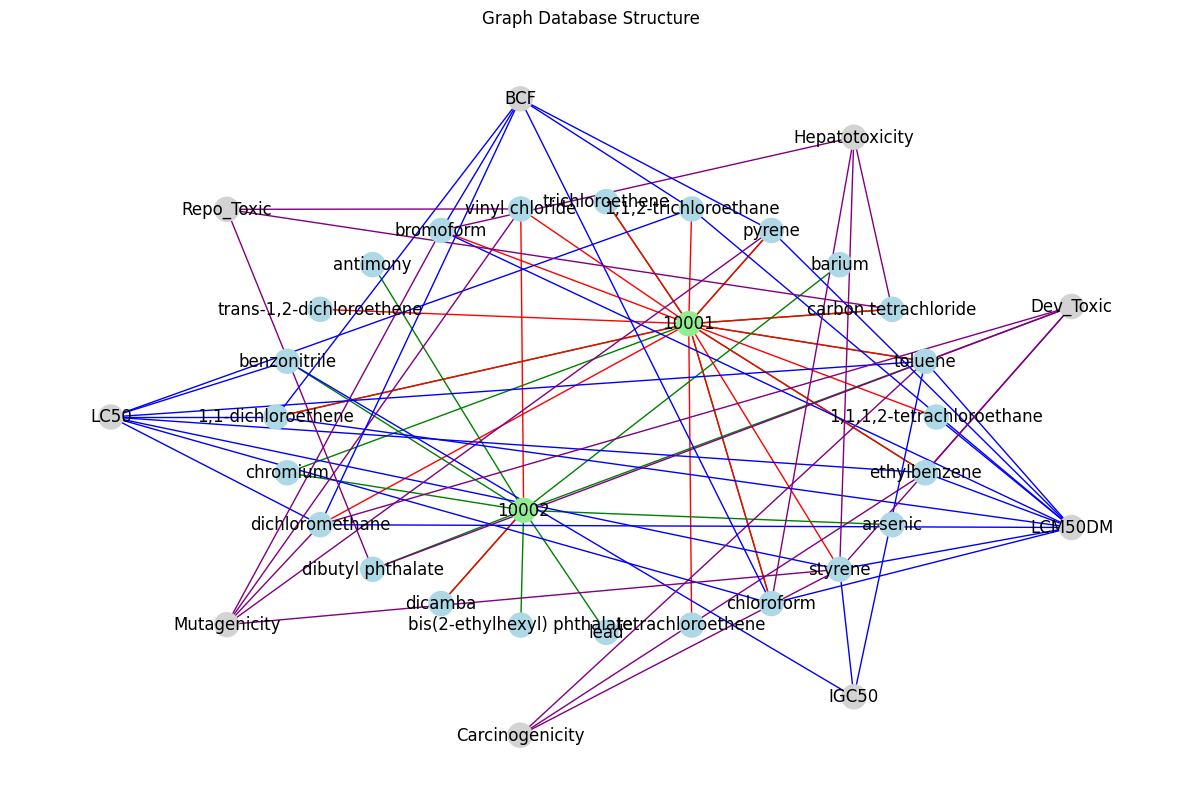

In [228]:
# Define node colors by 'node_class'
node_colors = {
    'Chemical': 'lightblue',
    'Site': 'lightgreen',
    'Chem Desc': 'lightgrey'
}

# Define the layers
layers = {
    'Site': [],
    'Chemical': [],
    'Chem Desc': []
}

# Populate layers based on 'node_class' attribute
for node in subG.nodes(data=True):
    node_class = node[1]['node_class']
    print(node_class)
    layers[node_class].append(node[0])

# Create a list of layers for shell_layout
nodes_in_layers = [layers['Site'], layers['Chemical'], layers['Chem Desc']]

# Use shell_layout to get positions
pos = nx.shell_layout(subG, nodes_in_layers)

# Draw the graph using the shell layout
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(subG, pos, node_color=[node_colors[data['node_class']] for n, data in subG.nodes(data=True)])
nx.draw_networkx_labels(subG, pos)
nx.draw_networkx_edges(subG, pos, edge_color=edge_colors)
plt.title("Graph Database Structure")
plt.axis('off')  # Turn off the axis
plt.show()


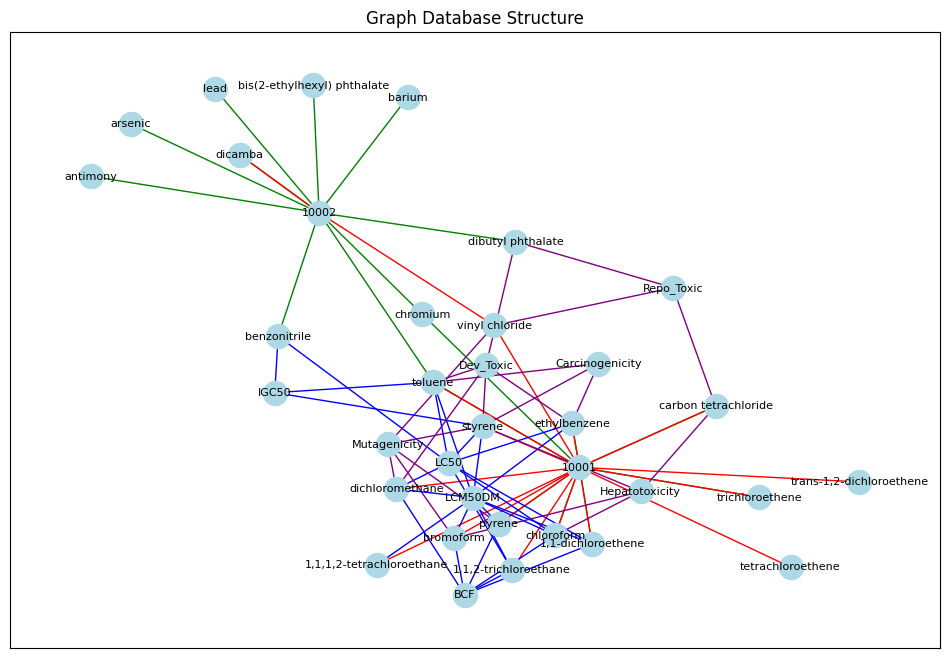

In [216]:
subG = G.subgraph(plot_nodes)

# Update the colors dictionary to include the new edge types
colors = {
    'Water': 'red',
    'Soil': 'green',
    'Cont_Env': 'blue',  # Assigning blue to 'Cont_Env'
    'Bin_Health': 'purple'  # Assigning yellow to 'Bin_Health'
}

# Modify edge color assignment to use the key
edge_colors = [colors[key] for u, v, key in subG.edges(keys=True)]

plt.figure(figsize=(12, 8))
# Use nx.draw_networkx to have more control over the drawing
nx.draw_networkx(subG, with_labels=True, edge_color=edge_colors, node_color='lightblue', font_size=8)
plt.title("Graph Database Structure")
plt.show()


In [176]:
for u in subG.edges(data = True):
    print(u)

('benzo(k)fluoranthene', 10003, {'Type': 'Soil'})
(10001, 'pyrene', {'Type': 'Soil'})
(10001, 'pyrene', {'Type': 'Water'})
(10001, 'carbon tetrachloride', {'Type': 'Soil'})
(10001, 'carbon tetrachloride', {'Type': 'Water'})
(10001, '1,1-dichloroethene', {'Type': 'Soil'})
(10001, '1,1-dichloroethene', {'Type': 'Water'})
(10001, 'chloroform', {'Type': 'Soil'})
(10001, 'chloroform', {'Type': 'Water'})
(10001, 'ethylbenzene', {'Type': 'Soil'})
(10001, 'ethylbenzene', {'Type': 'Water'})
(10001, 'chromium', {'Type': 'Soil'})
(10001, 'toluene', {'Type': 'Soil'})
(10001, 'toluene', {'Type': 'Water'})
(10001, 'trichloroethene', {'Type': 'Soil'})
(10001, 'trichloroethene', {'Type': 'Water'})
(10001, '1,1,1,2-tetrachloroethane', {'Type': 'Water'})
(10001, 'vinyl chloride', {'Type': 'Water'})
(10001, '1,1,2-trichloroethane', {'Type': 'Water'})
(10001, 'trans-1,2-dichloroethene', {'Type': 'Water'})
(10001, 'dichloromethane', {'Type': 'Water'})
(10001, 'tetrachloroethene', {'Type': 'Water'})
(10001,

Export

In [234]:
import csv

# Write nodes to CSV

# Identify all unique attributes across all nodes
all_attributes = set()
for _, node_data in G.nodes(data=True):
    all_attributes.update(node_data.keys())

# Convert the set of attributes to a list and sort it
attributes_list = sorted(list(all_attributes))

# Write nodes to CSV, including all attributes
with open('nodes.csv', 'w', newline='') as node_file:
    writer = csv.DictWriter(node_file, fieldnames=["Id", "Label"] + attributes_list)
    writer.writeheader()
    for node, data in G.nodes(data=True):
        # Fill in default values for missing attributes for each node
        node_data = {attr: data.get(attr, '') for attr in attributes_list}
        node_data["Id"] = node
        node_data["Label"] = str(node)  # Using the node ID as a label if not provided
        writer.writerow(node_data)

# Note: The relationships.csv file will remain the same as the previous example

# Write relationships to CSV
with open('relationships.csv', 'w', newline='') as edge_file:
    writer = csv.writer(edge_file)
    writer.writerow(["Source", "Target", "Type", "Key", "Value"])  # Header
    for source, target, key, data in G.edges(keys=True, data=True):
        writer.writerow([source, target, data.get('Type', ''), key, data.get('value', '')])


In [233]:
G.edges(data = True)

MultiEdgeDataView([(10001, 'pyrene', {'Type': 'Soil'}), (10001, 'pyrene', {'Type': 'Water'}), (10001, 'carbon tetrachloride', {'Type': 'Soil'}), (10001, 'carbon tetrachloride', {'Type': 'Water'}), (10001, '1,1-dichloroethene', {'Type': 'Soil'}), (10001, '1,1-dichloroethene', {'Type': 'Water'}), (10001, 'chloroform', {'Type': 'Soil'}), (10001, 'chloroform', {'Type': 'Water'}), (10001, 'ethylbenzene', {'Type': 'Soil'}), (10001, 'ethylbenzene', {'Type': 'Water'}), (10001, 'chromium', {'Type': 'Soil'}), (10001, 'toluene', {'Type': 'Soil'}), (10001, 'toluene', {'Type': 'Water'}), (10001, 'trichloroethene', {'Type': 'Soil'}), (10001, 'trichloroethene', {'Type': 'Water'}), (10001, '1,1,1,2-tetrachloroethane', {'Type': 'Water'}), (10001, 'vinyl chloride', {'Type': 'Water'}), (10001, '1,1,2-trichloroethane', {'Type': 'Water'}), (10001, 'trans-1,2-dichloroethene', {'Type': 'Water'}), (10001, 'dichloromethane', {'Type': 'Water'}), (10001, 'tetrachloroethene', {'Type': 'Water'}), (10001, 'bromofor

# Figures from Neo4J Outputs

In [1]:
import pandas as pd
import json

poverty_data = pd.read_csv("Neo4JOutputs/count_level_summary.csv")

toxic = pd.read_csv("Neo4JOutputs/Dev_Toxic_Water.csv")

In [3]:
poverty_data

Unnamed: 0  Geography       avg_pop population_category  percent_black  \
0             1    Appling  18136.826087              medium      19.763404   
1             2   Atkinson   8189.739130            very low      15.629888   
2             3      Bacon  10906.217391                 low      16.445242   
3             4      Baker   3462.565217            very low      38.220065   
4             5    Baldwin  45536.956522                high      42.048278   
..          ...        ...           ...                 ...            ...   
154         155  Whitfield  99070.782609           very high       3.462285   
155         156     Wilcox   8870.434783            very low      35.570624   
156         157     Wilkes  10222.173913                 low      41.890375   
157         158  Wilkinson   9485.739130            very low      39.038569   
158         159      Worth  21270.434783              medium      28.133294   

    black_percentile_category  poverty_rate poor_percentile_category  \
0                         low     23.422823                     high   
1                         low     28.172589                very high   
2                         low     26.110090                very high   
3                        high     20.614887                   medium   
4                   very high     23.720588                     high   
..                        ...           ...                      ...   
154                  very low     16.242597                      low   
155                      high     25.026257                very high   
156                      high     22.440087                     high   
157                      high     24.651004                very high   
158                    medium     18.856715                   medium   

     age_18_24_score  educational_score_25_over age_18_24_percentile_category  \
0           1.052459                   1.312125                      very low   
1           0.983951                   1.200265                      very low   
2           1.152807                   1.342518                           low   
3           1.095238                   1.630890                           low   
4           1.548893                   1.740812                     very high   
..               ...                        ...                           ...   
154         1.357603                   1.345530                          high   
155         0.991848                   1.420438                      very low   
156         1.189459                   1.333808                           low   
157         1.282454                   1.376569                        medium   
158         1.348664                   1.410507                          high   

    educational_score_25_over_percentile_category  I  IV  II  V  total_sites  \
0                                        very low  1   0   0  0            1   
1                                        very low  1   0   0  0            1   
2                                        very low  0   1   0  0            1   
3                                            high  0   0   0  0            0   
4                                            high  0   1   0  0            1   
..                                            ... ..  ..  .. ..          ...   
154                                           low  0   2   0  0            2   
155                                           low  0   0   0  0            0   
156                                      very low  0   1   0  0            1   
157                                           low  0   1   0  0            1   
158                                           low  0   1   0  0            1   

    SitesCategory                 group_identifier       years  
0        >=1 Site         medium.low.high.very low        1994  
1        >=1 Site  very low.low.very high.very low        1994  
2        >=1 Site       low.low.very high.very low        2002

In [9]:
counties_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01001',
    'STATE': '01',
    'COUNTY': '001',
    'NAME': 'Autauga',
    'LSAD': 'County',
    'CENSUSAREA': 594.436},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.496774, 32.344437],
      [-86.717897, 32.402814],
      [-86.814912, 32.340803],
      [-86.890581, 32.502974],
      [-86.917595, 32.664169],
      [-86.71339, 32.661732],
      [-86.714219, 32.705694],
      [-86.413116, 32.707386],
      [-86.411172, 32.409937],
      [-86.496774, 32.344437]]]},
   'id': '01001'},
  {'type': 'Feature',
   'properties': {'GEO_ID': '0500000US01009',
    'STATE': '01',
    'COUNTY': '009',
    'NAME': 'Blount',
    'LSAD': 'County',
    'CENSUSAREA': 644.776},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-86.577799, 33.765316],
      [-86.759144, 33.840617],
      [-86.953664, 33.815297],
      [-86.954305, 33.844862],
      [-86.96296, 33.844865],
      [-86.9

In [26]:
import plotly.graph_objs as go
import json

# Assuming 'toxic' and 'poverty_data' are your dataframes

# Load the GeoJSON file for US counties
with open('Neo4JOutputs/geojson-counties-fips.json') as file:
    counties_geojson = json.load(file)

georgia_features = [feature for feature in counties_geojson['features'] if feature['properties']['STATE'] == '13']

georgia_geojson = {
    "type": "FeatureCollection",
    "features": georgia_features
}

# Custom color scale for chemicals
chemical_colorscale = [
    [0, 'rgb(255, 255, 204)'],
    [0.5, 'rgb(161, 218, 180)'],
    [1, 'rgb(44, 162, 95)']
]

# Create a scatter plot for the sites
scatter = go.Scattergeo(
    lon = toxic['Long'],
    lat = toxic['Lat'],
    text = toxic['Site_Name'],
    mode = 'markers',
    marker = dict(
        color = toxic['counts'],
        colorscale = chemical_colorscale,
        colorbar = dict(
            title = 'Number of Chemicals',
            x = 0.1
        ),
        opacity = 0.8,
        reversescale = False,
        symbol = 'circle',
        showscale = True
    )
)

# Create a map with both the scatter plot and the county boundaries
fig = go.Figure(scatter)
fig.update_geos(
    fitbounds="locations",
    visible=False
)
fig.add_trace(
    go.Choropleth(
        geojson=georgia_geojson,
        featureidkey="properties.NAME",
        locations=poverty_data['Geography'],
        z=poverty_data['poverty_rate'],
        colorscale="Reds",
        colorbar = dict(
            title = 'Poverty Rate',
            x = 0.9
        ),
        marker_line_width=0
    )
)
fig.update_layout(
    title_text = '% Poverty & Development Health',
    geo_scope='usa',
)

# Show the figure
fig.show()
